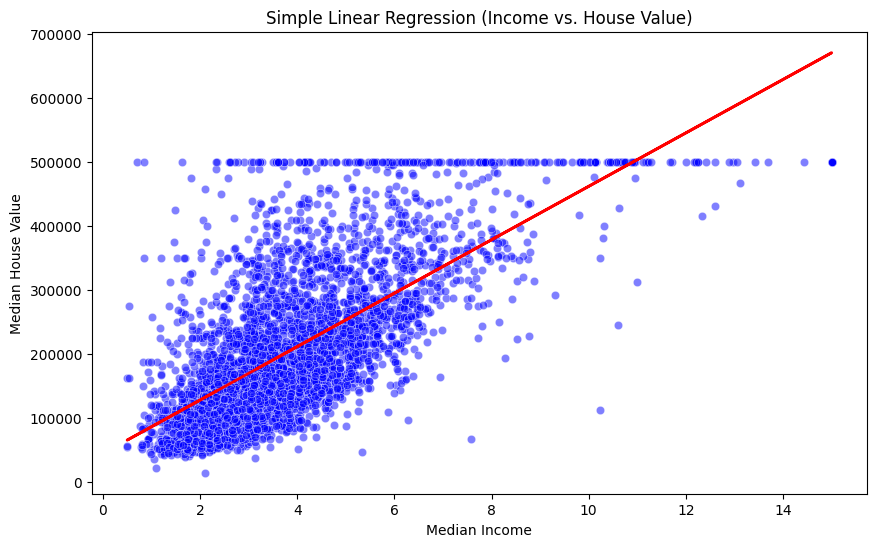

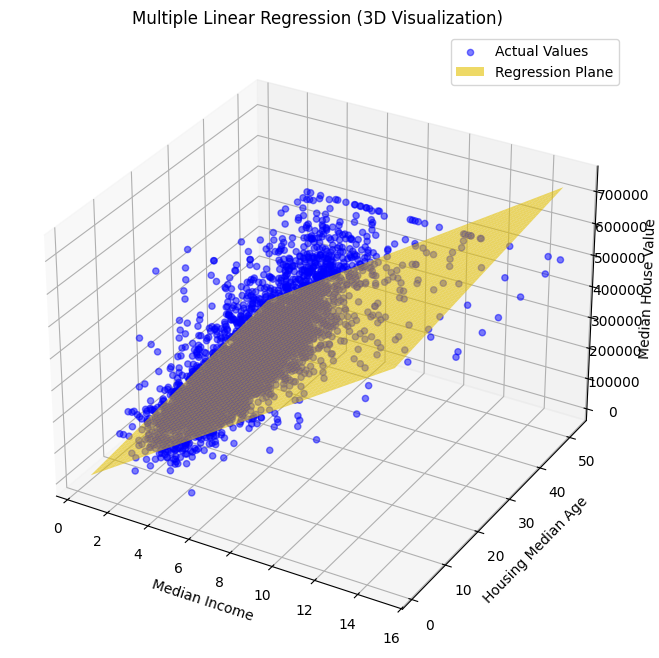

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset (replace with your path)
try:
    df = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Dataset not found! Download from Kaggle:")
    print("https://www.kaggle.com/datasets/camnugent/california-housing-prices")

# Data Preprocessing
df = df.dropna()  # Remove missing values
X = df[['median_income', 'housing_median_age']]  # Multiple features
y = df['median_house_value']

# Simple Linear Regression (1 feature)
X_simple = df[['median_income']]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Plot simple regression
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['median_income'], y=y_test, color='blue', alpha=0.5)
plt.plot(X_test, simple_model.predict(X_test), color='red', linewidth=2)
plt.title('Simple Linear Regression (Income vs. House Value)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Multiple Linear Regression (2 features)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y, test_size=0.2, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual values
ax.scatter(X_test_multi['median_income'], 
           X_test_multi['housing_median_age'], 
           y_test_multi, 
           c='blue', 
           alpha=0.5,
           label='Actual Values')

# Create regression plane
x1_range = np.linspace(X['median_income'].min(), X['median_income'].max(), 50)
x2_range = np.linspace(X['housing_median_age'].min(), X['housing_median_age'].max(), 50)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

y_plane = multi_model.intercept_ + \
          multi_model.coef_[0] * x1_mesh + \
          multi_model.coef_[1] * x2_mesh

ax.plot_surface(x1_mesh, x2_mesh, y_plane, color='gold', alpha=0.6, label='Regression Plane')

ax.set_xlabel('Median Income')
ax.set_ylabel('Housing Median Age')
ax.set_zlabel('Median House Value')
plt.title('Multiple Linear Regression (3D Visualization)')
plt.legend()
plt.show()